In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6c1943fe39c97d7b5fe572b90160c034cc1704b8ea92c609e6aef2d05ab7cdde
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, hour, when
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, FloatType

# **1.CREATING SPARK SESSION**

In [3]:
spark = SparkSession.builder \
    .appName("ChicagoCrimeAnalysis") \
    .getOrCreate()

# **2.Define the schema for loading the Chicago crime dataset**

In [4]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, FloatType

# Define the schema matching the provided data types
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", BooleanType(), True),
    StructField("Domestic", BooleanType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", FloatType(), True),
    StructField("Ward", FloatType(), True),
    StructField("Community Area", FloatType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", FloatType(), True),
    StructField("Y Coordinate", FloatType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", StringType(), True),
    StructField("Latitude", FloatType(), True),
    StructField("Longitude", FloatType(), True),
    StructField("Location", StringType(), True)
])

## **3.Load the Chicago crime data (you should get more than a million rows).**

In [5]:
from google.colab import drive
drive.mount('/content/drive')
crime_data = spark.read.csv("/content/drive/MyDrive/Crimes-2001_to_Present.csv", schema=schema, header=True)

Mounted at /content/drive


In [6]:
# Display the schema of the crime data
crime_data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: float (nullable = true)
 |-- Ward: float (nullable = true)
 |-- Community Area: float (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: float (nullable = true)
 |-- Y Coordinate: float (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- Location: string (nullable = true)



In [7]:
# Count the number of rows in the DataFrame
row_count = crime_data.count()
print("Number of rows:", row_count)

Number of rows: 8026144


In [8]:
crime_data.show(50)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On| Latitude| Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   

## **4.Clean the data:**


## **a.Remove all null values.**

In [9]:
crime_data = crime_data.dropna()

In [10]:
# Count the number of rows in the DataFrame aftre dropping null values
row_count = crime_data.count()
print("Number of rows after dropping null values:", row_count)

Number of rows after dropping null values: 7322843


# You could see that after dropping null values no.of rows will be 7322843 previoulsy it was 8026144

# **b.Change 'Date' column data type**

In [11]:
# Change 'Date' column data type
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import to_timestamp
# Define the date format string
date_format = "MM/dd/yyyy hh:mm:ss a"

# Convert the "Date" column to TimestampType with the specified format
crime_data = crime_data.withColumn("Date", to_timestamp("Date", date_format))

In [12]:
crime_data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: float (nullable = true)
 |-- Ward: float (nullable = true)
 |-- Community Area: float (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: float (nullable = true)
 |-- Y Coordinate: float (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- Location: string (nullable = true)



In [13]:
crime_data.show(20)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On| Latitude| Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           APARTMENT| false|   fals

# Datatype of date will be changed to timestampType

# **5.Filter the data for last ten years.**

In [14]:
# Filter the data for the last ten years
current_year = 2024
crime_data_last_ten_years = crime_data.filter(year("Date") >= (current_year - 10))

In [15]:
crime_data.show(100)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On| Latitude| Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           APARTMENT| false|   fals

# **Remove all the records with the following crime types:t**


In [16]:
crime_data_cleaned = crime_data.filter(~col("Primary Type").isin(
    "NON-CRIMINAL (SUBJECT SPECIFIED)",
    "OTHER OFFENSE",
    "STALKING",
    "NON - CRIMINAL",
    "ARSON"
))

In [17]:
crime_data_cleaned.show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On| Latitude| Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           APARTMENT| false|   fals

**Merge the similar crime types.
For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.**

In [18]:
print(crime_data_cleaned.columns)

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [19]:
# Merge similar crime types
merged_type = when(
    (col("Primary Type") == "SEX OFFENSE") | (col("Primary Type") == "PROSTITUTION"),
    "SEX OFFENSE/PROSTITUTION"
).otherwise(col("Primary Type"))

In [20]:
# Apply the conditions and update the 'Primary Type' column
crime_data_cleaned = crime_data.withColumn("Primary Type", merged_type)

# Display the updated DataFrame
crime_data_cleaned.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On| Latitude| Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+---------+----------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           APARTMENT| false|   fals

**Analyze the data and present results:
a.Show year-wise trend of the crime for last ten years**.

In [21]:
import matplotlib.pyplot as plt
# Filter the data for the last ten years
current_year = 2024
crime_last_ten_years = crime_data_cleaned.filter(crime_data["Year"] >= current_year - 10)
# Group by year and count the number of crimes for each year
crime_by_year = crime_last_ten_years.groupBy("Year").count().orderBy("Year")
# Convert DataFrame to Pandas for plotting
crime_by_year_pd = crime_by_year.toPandas()
crime_by_year_pd

,Year,count
0,2014,273638
1,2015,257791
2,2016,266489
3,2017,264159
4,2018,262909
5,2019,258172
6,2020,206925
7,2021,202032
8,2022,234265
9,2023,259961


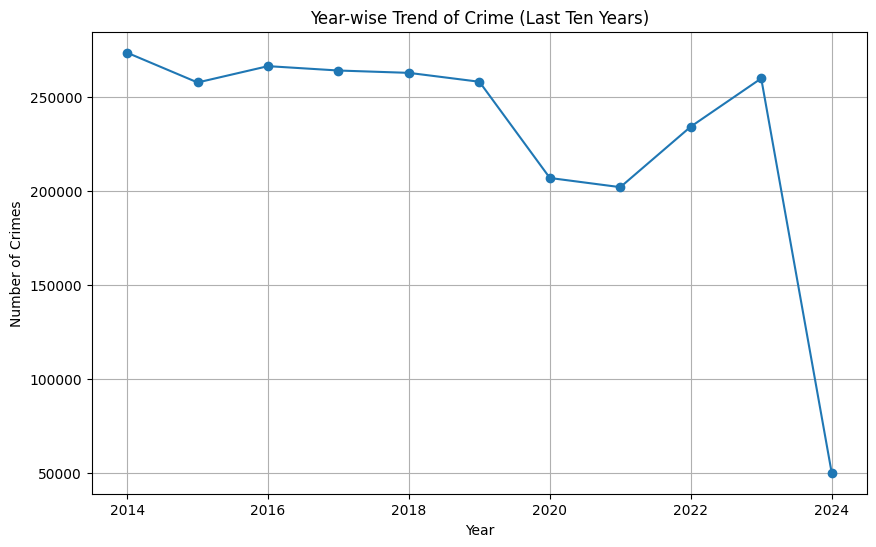

In [26]:
# Plot year-wise trend of crime using a line plot
plt.figure(figsize=(10, 6))
plt.plot(crime_by_year_pd["Year"], crime_by_year_pd["count"], marker='o', linestyle='-')
plt.title("Year-wise Trend of Crime (Last Ten Years)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

 **b.Find out at which hour of the day crime is highest.**

In [23]:
# Extract hour from the "Date" column
crime_data_with_hour = crime_data.withColumn("Hour", hour("Date"))

# Group by hour and count the number of crimes for each hour
crime_by_hour = crime_data_with_hour.groupBy("Hour").count().orderBy("count", ascending=False)

# Find the hour with the highest number of crimes
max_crime_hour = crime_by_hour.first()["Hour"]
max_crime_count = crime_by_hour.first()["count"]

print(f"The hour with the highest number of crimes is {max_crime_hour}:00 with {max_crime_count} crimes.")

The hour with the highest number of crimes is 12:00 with 418154 crimes.


**c)Find top ten crimes and present them as a bar chart.**

In [24]:
from pyspark.sql.functions import count
crime_counts = crime_data_cleaned.groupBy("Primary Type").agg(count("ID").alias("CrimeCount"))
crime_counts.show()

+--------------------+----------+
|        Primary Type|CrimeCount|
+--------------------+----------+
|OFFENSE INVOLVING...|     50970|
|CRIMINAL SEXUAL A...|      7448|
|            STALKING|      4902|
|PUBLIC PEACE VIOL...|     49505|
|           OBSCENITY|       788|
|               ARSON|     12337|
|            GAMBLING|     13420|
|   CRIMINAL TRESPASS|    200253|
|             ASSAULT|    486704|
|LIQUOR LAW VIOLATION|     12960|
| MOTOR VEHICLE THEFT|    364685|
|               THEFT|   1552795|
|             BATTERY|   1340752|
|SEX OFFENSE/PROST...|     89111|
|             ROBBERY|    278173|
|            HOMICIDE|     12742|
|           RITUALISM|        15|
|    PUBLIC INDECENCY|       188|
| CRIM SEXUAL ASSAULT|     24024|
|   HUMAN TRAFFICKING|        95|
+--------------------+----------+
only showing top 20 rows



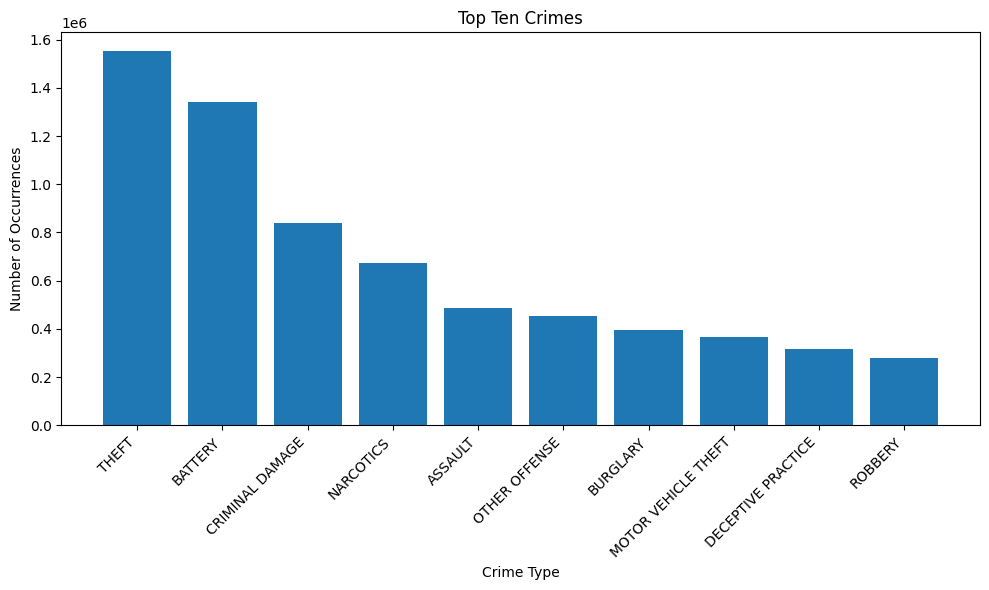

In [25]:
# Order by count in descending order and limit to top ten crimes
top_ten_crimes = crime_counts.orderBy(col("CrimeCount").desc()).limit(10)

# Convert DataFrame to Pandas for plotting
top_ten_crimes_pd = top_ten_crimes.toPandas()

# Plot top ten crimes as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_crimes_pd["Primary Type"], top_ten_crimes_pd["CrimeCount"])
plt.title("Top Ten Crimes")
plt.xlabel("Crime Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()